<h1>Tables des matières<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pratique:-Clustering-avec-Kmeans-et-PCA" data-toc-modified-id="Pratique:-Clustering-avec-Kmeans-et-PCA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pratique: Clustering avec Kmeans et PCA</a></span></li><li><span><a href="#Lire-la-feuille-Excel" data-toc-modified-id="Lire-la-feuille-Excel-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Lire la feuille Excel</a></span></li><li><span><a href="#Faire-une-jointure-des-données" data-toc-modified-id="Faire-une-jointure-des-données-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Faire une jointure des données</a></span></li><li><span><a href="#Identifier-les-clusters" data-toc-modified-id="Identifier-les-clusters-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Identifier les clusters</a></span></li><li><span><a href="#Effectuer-la-PCA" data-toc-modified-id="Effectuer-la-PCA-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Effectuer la PCA</a></span></li><li><span><a href="#Afficher-les-clusters" data-toc-modified-id="Afficher-les-clusters-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Afficher les clusters</a></span></li></ul></div>

# Pratique: Clustering avec Kmeans et PCA

# Lire la feuille Excel

In [26]:

import pandas as pd

df_offers = pd.read_excel("WineKMC.xlsx", sheet_name=0)
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


In [27]:
df_transactions = pd.read_excel("./WineKMC.xlsx", sheet_name=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


# Faire une jointure des données

In [28]:
# joint entre offers et transactions 
df = pd.merge(df_offers, df_transactions)
df.head(10)


,offer_id,campaign,varietal,min_qty,discount,origin,past_peak,customer_name,n
0,1,January,Malbec,72,56,France,False,Thomas,1
1,1,January,Malbec,72,56,France,False,Jackson,1
2,1,January,Malbec,72,56,France,False,Mitchell,1
3,1,January,Malbec,72,56,France,False,Peterson,1
4,1,January,Malbec,72,56,France,False,Wood,1
5,1,January,Malbec,72,56,France,False,Price,1
6,1,January,Malbec,72,56,France,False,Foster,1
7,1,January,Malbec,72,56,France,False,Sanders,1
8,1,January,Malbec,72,56,France,False,Butler,1
9,1,January,Malbec,72,56,France,False,Fisher,1


In [29]:
# create a "pivot table" which will give us the number of times each customer responded to a given offer
matrix = df.pivot_table(index=['customer_name'], columns=['offer_id'], values='n')
# a little tidying up. fill NA values with 0 and make the index into a column
matrix = matrix.fillna(0).reset_index()
# save a list of the 0/1 columns.  
x_cols = matrix.columns[1:]
print(matrix)

offer_id customer_name    1    2    3    4    5    6    7    8    9 ...    23  \
0                Adams  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
1                Allen  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0 ...   0.0   
2             Anderson  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
3               Bailey  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0 ...   0.0   
4                Baker  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0 ...   0.0   
5               Barnes  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
6                 Bell  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
7              Bennett  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0 ...   0.0   
8               Brooks  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0 ...   0.0   
9                Brown  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0 ...   0.0   
10              Butler  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
11            Campbell  0.0 

# Identifier les clusters

In [30]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=5)
# slice matrix so we only include the 0/1 indicator columns in the clustering
matrix['cluster'] = cluster.fit_predict(matrix[matrix.columns[2:]])
matrix.cluster.value_counts()

4    37
0    23
1    15
3    13
2    12
Name: cluster, dtype: int64

In [31]:
#utiliser DF
#pca = PCA(n_components=2)
#print(matrix[x_cols])
#print(pca.fit_transform(matrix[x_cols]))
 

# Effectuer la PCA

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
#premiere colonne PCA
matrix['PC1'] = pca.fit_transform(matrix[x_cols])[:,0]
#deuxieme colonne PCA
matrix['PC2'] = pca.fit_transform(matrix[x_cols])[:,1]
matrix = matrix.reset_index()

customer_clusters = matrix[['customer_name', 'cluster', 'PC1', 'PC2']]
customer_clusters.head()

offer_id,customer_name,cluster,PC1,PC2
0,Adams,0,1.007580,0.108215
1,Allen,4,-0.287539,0.044715
2,Anderson,1,-0.392032,1.038391
3,Bailey,0,0.699477,-0.022542
4,Baker,3,0.088183,-0.471695


# Afficher les clusters

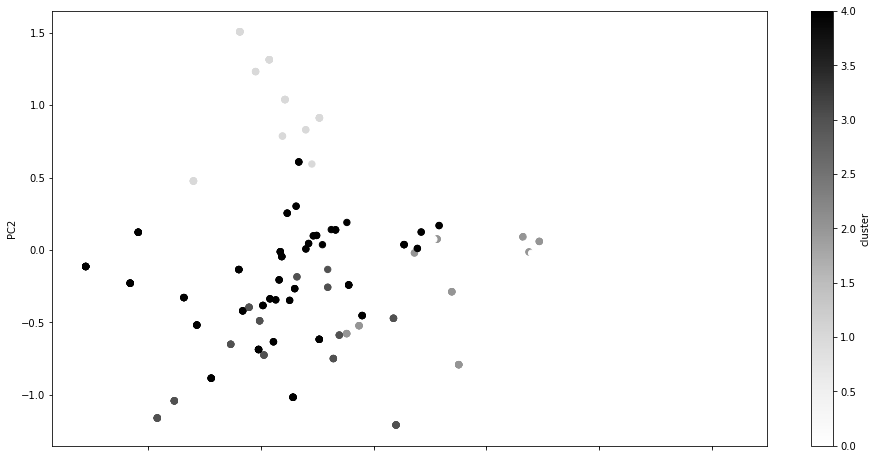

In [33]:
%matplotlib inline

df = pd.merge(df_transactions, customer_clusters)
df = pd.merge(df_offers, df)    
ax = df.plot(kind='scatter', x='PC1', y='PC2', figsize=(16,8),c='cluster',s=40)


 

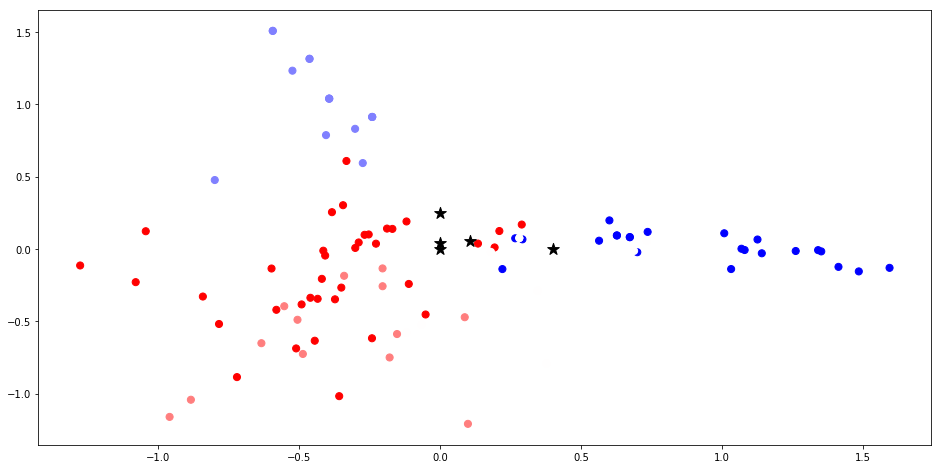

In [35]:
#avec matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.scatter(matrix['PC1'], matrix['PC2'], s = 50,  cmap = plt.cm.bwr, c = cluster.labels_) 

plt.scatter(cluster.cluster_centers_[:, 0], 
            cluster.cluster_centers_[:, 1], 
            marker = '*', 
            s = 150,
            color = 'black', 
            label = 'Centroide')

In [64]:
df['is_4'] = df.cluster==4
df.groupby("is_4").varietal.value_counts()

is_4   varietal          
False  Champagne             57
       Pinot Noir            43
       Malbec                29
       Cabernet Sauvignon    27
       Prosecco              27
       Espumante             21
       Merlot                13
       Pinot Grigio          10
       Chardonnay             7
True   Champagne             24
       Espumante             19
       Prosecco              16
       Chardonnay             8
       Merlot                 7
       Pinot Grigio           7
       Cabernet Sauvignon     5
       Malbec                 3
       Pinot Noir             1
dtype: int64

In [65]:
df.groupby("is_4")[['min_qty', 'discount']].mean()

,min_qty,discount
is_4,,
False,59.076923,59.576923
True,56.666667,59.233333


In [ ]:
#Référence http://blog.yhat.com/posts/customer-segmentation-using-python.html